# Яндекс Музыка

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс Музыки вы сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей вы получите из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Вы проверите данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



## Обзор данных

Составьте первое представление о данных Яндекс Музыки.




**Задание 1**

In [1]:
import pandas as pd

**Задание 2**

In [2]:
df = pd.read_csv('/datasets/yandex_music_project.csv')

**Задание 3**

In [3]:
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


**Задание 4**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Задание 5**

In [5]:
# не используется snake_case, например, в колонке userID

**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Переименование столбцов

**Задание 6**

In [6]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

**Задание 7**

In [7]:
df = df.rename(columns={
        '  userID': 'user_id',
        'Track'   : 'track',
        '  City  ': 'city',
        'Day'     : 'day',
    }
)

**Задание 8**

In [8]:
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Обработка пропущенных значений

**Задание 9**

In [9]:
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

**Задание 10**

In [10]:
columns_to_replace = ['track', 'artist', 'genre']
df[columns_to_replace] = df[columns_to_replace].fillna('unknown')

**Задание 11**

In [11]:
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Обработка дубликатов

**Задание 12**

In [12]:
df.duplicated().sum()

3826

**Задание 13**

In [13]:
df = df.drop_duplicates().reset_index(drop=True)

**Задание 14**

In [14]:
df.duplicated().sum()

0

**Задание 15**

In [15]:
sorted(df.genre.unique())

['acid',
 'acoustic',
 'action',
 'adult',
 'africa',
 'afrikaans',
 'alternative',
 'alternativepunk',
 'ambient',
 'americana',
 'animated',
 'anime',
 'arabesk',
 'arabic',
 'arena',
 'argentinetango',
 'art',
 'audiobook',
 'author',
 'avantgarde',
 'axé',
 'baile',
 'balkan',
 'beats',
 'bigroom',
 'black',
 'bluegrass',
 'blues',
 'bollywood',
 'bossa',
 'brazilian',
 'breakbeat',
 'breaks',
 'broadway',
 'cantautori',
 'cantopop',
 'canzone',
 'caribbean',
 'caucasian',
 'celtic',
 'chamber',
 'chanson',
 'children',
 'chill',
 'chinese',
 'choral',
 'christian',
 'christmas',
 'classical',
 'classicmetal',
 'club',
 'colombian',
 'comedy',
 'conjazz',
 'contemporary',
 'country',
 'cuban',
 'dance',
 'dancehall',
 'dancepop',
 'dark',
 'death',
 'deep',
 'deutschrock',
 'deutschspr',
 'dirty',
 'disco',
 'dnb',
 'documentary',
 'downbeat',
 'downtempo',
 'drum',
 'dub',
 'dubstep',
 'eastern',
 'easy',
 'electronic',
 'electropop',
 'emo',
 'entehno',
 'epicmetal',
 'estrada',


**Задание 16**

In [16]:
df.genre.replace(
    to_replace=['hip', 'hop', 'hip-hop'],
    value='hiphop',
    inplace=True
)

**Задание 17**

In [17]:
sorted(df.genre.unique())

['acid',
 'acoustic',
 'action',
 'adult',
 'africa',
 'afrikaans',
 'alternative',
 'alternativepunk',
 'ambient',
 'americana',
 'animated',
 'anime',
 'arabesk',
 'arabic',
 'arena',
 'argentinetango',
 'art',
 'audiobook',
 'author',
 'avantgarde',
 'axé',
 'baile',
 'balkan',
 'beats',
 'bigroom',
 'black',
 'bluegrass',
 'blues',
 'bollywood',
 'bossa',
 'brazilian',
 'breakbeat',
 'breaks',
 'broadway',
 'cantautori',
 'cantopop',
 'canzone',
 'caribbean',
 'caucasian',
 'celtic',
 'chamber',
 'chanson',
 'children',
 'chill',
 'chinese',
 'choral',
 'christian',
 'christmas',
 'classical',
 'classicmetal',
 'club',
 'colombian',
 'comedy',
 'conjazz',
 'contemporary',
 'country',
 'cuban',
 'dance',
 'dancehall',
 'dancepop',
 'dark',
 'death',
 'deep',
 'deutschrock',
 'deutschspr',
 'dirty',
 'disco',
 'dnb',
 'documentary',
 'downbeat',
 'downtempo',
 'drum',
 'dub',
 'dubstep',
 'eastern',
 'easy',
 'electronic',
 'electropop',
 'emo',
 'entehno',
 'epicmetal',
 'estrada',


**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Вы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез.

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга.
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


**Задание 18**



<AxesSubplot:ylabel='city'>

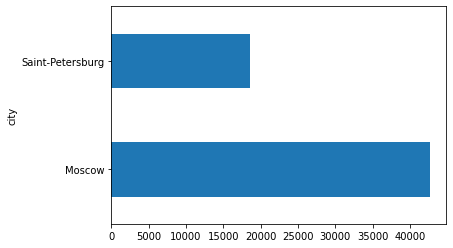

In [18]:
grouped_by_city = df.groupby('city')['user_id'].count()
grouped_by_city

grouped_by_city.plot.barh()

**Задание 19**


In [84]:
grouped_by_weekday = df.groupby('day')['user_id'].count()
grouped_by_weekday

day
Friday       21840
Monday       21354
Wednesday    18059
Name: user_id, dtype: int64

**Задание 20**

In [19]:
def number_tracks(day, city):
    track_list = df[df.day == day]
    track_list = track_list[track_list.city == city]
    track_list_count = track_list['user_id'].count() 
    return track_list_count

**Задание 21**

In [39]:
monday_moscow_tracks_count = number_tracks('Monday', 'Moscow')
monday_moscow_tracks_count

15740

In [40]:
monday_spb_tracks_count = number_tracks('Monday', 'Saint-Petersburg')
monday_spb_tracks_count

5614

In [41]:
wednesday_moscow_tracks_count = number_tracks('Wednesday', 'Moscow')
wednesday_moscow_tracks_count

11056

In [42]:
wednesday_spb_tracks_count = number_tracks('Wednesday', 'Saint-Petersburg')
wednesday_spb_tracks_count

7003

In [43]:
friday_moscow_tracks_count = number_tracks('Friday', 'Moscow')
friday_moscow_tracks_count

15945

In [44]:
friday_spb_tracks_count = number_tracks('Friday', 'Saint-Petersburg')
friday_spb_tracks_count

5895

**Задание 22**

In [46]:
info = pd.DataFrame(
    columns=['city', 'monday', 'wednesday', 'friday'],
    data=[
        {
            'city': 'Moscow',
            'monday': monday_moscow_tracks_count,
            'wednesday': wednesday_moscow_tracks_count,
            'friday': friday_moscow_tracks_count
        },
        {
            'city': 'Saint-Petersburg',
            'monday': monday_spb_tracks_count,
            'wednesday': wednesday_spb_tracks_count,
            'friday': friday_spb_tracks_count
        }
    ]
)
info

,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

**Задание 23**

In [47]:
moscow_general = df[df.city == 'Moscow']

In [48]:
spb_general = df[df.city == 'Saint-Petersburg']

**Задание 24**

In [104]:
def genre_weekday(df, day, time1, time2):
    filtering_expr = '''time > @time1 & time < @time2 & day == @day'''
    genre_df = df.query(filtering_expr)
    genre_df_grouped = genre_df.groupby('genre')['genre'].count()
    genre_df_sorted = genre_df_grouped.sort_values(ascending=False)
    return genre_df_sorted[:10]

**Задание 25**

In [105]:
top10_msc_monday_morning= genre_weekday(moscow_general, 'Monday', '07:00', '11:00')
top10_msc_monday_morning

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: genre, dtype: int64

In [106]:
top10_sbp_monday_morning = genre_weekday(spb_general, 'Monday', '07:00', '11:00')
top10_sbp_monday_morning

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: genre, dtype: int64

In [107]:
top10_msc_friday_evening = genre_weekday(moscow_general, 'Friday', '17:00', '23:00')
top10_msc_friday_evening

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: genre, dtype: int64

In [108]:
top10_sbp_friday_evening = genre_weekday(spb_general, 'Friday', '17:00', '23:00')
top10_sbp_friday_evening

genre
pop            256
electronic     216
rock           216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: genre, dtype: int64

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное различие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

**Задание 26**

In [112]:
moscow_genres = moscow_general.\
groupby('genre')['genre'].\
count().\
sort_values(ascending=False) 

**Задание 27**

In [113]:
moscow_genres.head(10)

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64

**Задание 28**

In [115]:
spb_genres = spb_general.\
groupby('genre')['genre'].\
count().\
sort_values(ascending=False) 

**Задание 29**

In [116]:
spb_genres.head(10)

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге.


## Итоги исследования

Вы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге.

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего, чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из части данных одного сервиса невозможно сделать какие-то выводы о всех пользователях сервиса без методов статистики.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных.
С методами проверок гипотез вы ещё познакомитесь в следующих темах.